<a href="https://colab.research.google.com/github/Isabellitankian/FIAP---2023/blob/main/Redes_Neurais_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Imagens com Redes Neurais Convolucionais 

## Definição dos Dados

Data Science, Deep Learning, Machine Learning, Inteligência Artificial. Nada disso faz sentido sem dados, muitos dados (por isso Big Data é cada vez mais importante nos dias de hoje). E para esta tarefa, teremos os seguintes dados:

Conjunto de dados de treino: Teremos 12.500 imagens de cães e 12.500 imagens de gatos para o conjunto de treinamento.

Conjunto de dados de validação: Teremos 12.500 imagens de cães e gatos.

Conjunto de dados de teste: Teremos 1.000 imagens de cães e gatos.

Essa á uma questão onde os iniciantes tem muitas dúvidas. Por que precisamos de dados de treino, validação e teste? Usamos os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usamos os dados de validação, para avaliar o modelo durante o treinamento. Usamos os dados de teste para validar a performance do modelo já treinado, ou seja, apresentamos ao modelo dados que ele não viu durante o treinamento, a fim de garantir que ele é capaz de fazer previsões.

## Fonte dos Dados

Usaremos como fonte de dados, o famoso dataset Dogs and Cats oferecido pelo Kaggle, o portal sobre Competições de Data Science. O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. 

https://www.kaggle.com/c/dogs-vs-cats/data

## Carregando os Dados

Se você criou a estrutura de diretórios de forma correta, então as seguintes células mostrarão algumas das imagens:

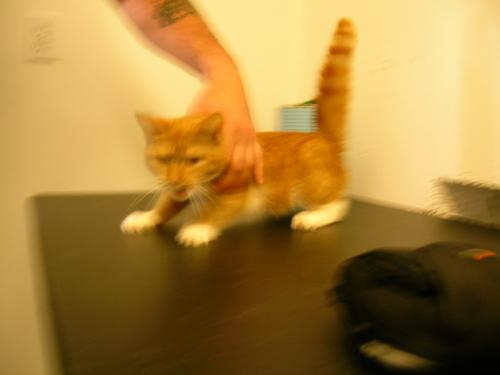

In [ ]:
from IPython.display import Image
Image(filename = '/content/dataset_teste/cats/0.jpg')

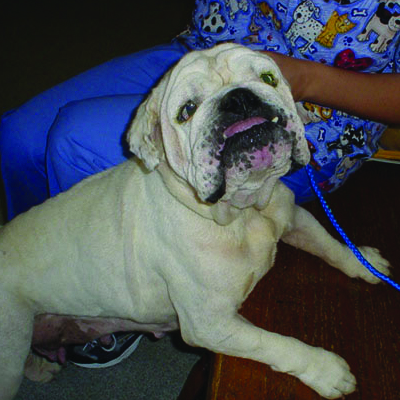

In [ ]:
Image(filename='/content/dataset_treino/dogs/6245.jpg')

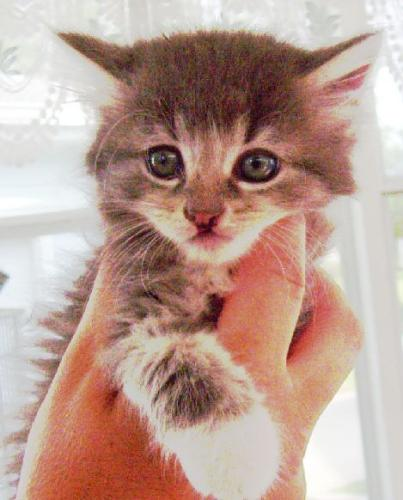

In [ ]:
Image(filename='/content/dataset_teste/cats/100.jpg')

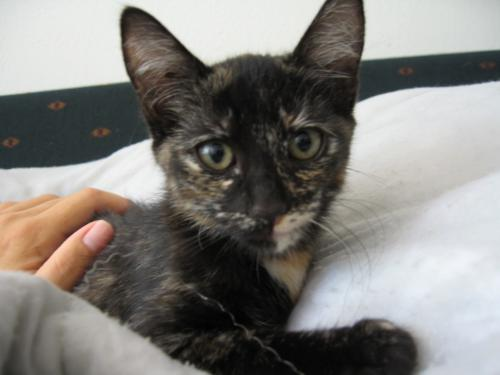

In [ ]:
Image(filename='/content/dataset_teste/cats/109.jpg')

## Construindo a Rede Neural Convolucional

Nossa rede é uma sequência de camadas e podemos usar o modelo sequencial oferecido pelo Keras, que possui as funções necessárias para construir cada camada de uma rede neural convolucional.

O primeiro passo é carregar os pacotes necessários, o que é feito nas células abaixo.

O Keras utiliza o TensorFlow como backend, pois na prática o Keras é apenas uma biblioteca para simplificar a complexidade do TensorFlow. Aqui estão as versões utilizadas:

In [ ]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.9.1


In [ ]:
import keras as K
print("Versão do Keras:", K.__version__)

Versão do Keras: 2.9.0


In [ ]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Nós então inicializamos a nossa rede:

In [ ]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

Agora nós definimos os parâmetros para o shape dos dados de entrada e a função de ativação. Usaremos 32 features para um array 2D e definiremos nosso array como o formato 3x3.

Converteremos todas as nossas imagens 64x64 pixels em um array 3D (pois as imagens são coloridas com 3 canais de cores).

In [ ]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))

Agora aplicamos o agrupamento (pooling) para reduzir o tamanho do mapa de features resultado da primeira camada de convolução (dividido por 2):

In [ ]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Adicionamos então a Segunda Camada de Convolução, tornando nossa rede um pouco mais profunda:

In [ ]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

Mais uma vez, aplicamos a camada de pooling à saída da camada de convolução anterior.

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Agora aplicamos o "achatamento" ou apenas Flatten para converter a estrutura de dados 2D resultado da camada anterior em uma estrutura 1D, ou seja, um vetor.

In [ ]:
# Passo 3 - Flattening
classifier.add(Flatten())

No próximo passo conectamos todas as camadas. Usamos uma função de ativação retificadora (relu) e então uma função de ativação sigmóide para obter as probabilidades de cada imagem conter um cachorro ou um gato. O modelo raramente terá 100% de certeza e o que ele gera como um resultado é uma probabilidade.

In [ ]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Finalmente nós compilamos nossa rede neural. Para compilar a rede, usamos o otimizador "Adam", um excelente algoritmo de primeira ordem para otimização baseada em gradiente de funções objetivas estocásticas, que toma como base uma estimativa adaptada de momentos de baixa ordem.

Usamos uma função log loss com "entropia binária cruzada", pois ela funciona bem com funções sigmóides. Nossa métrica será a acurácia, pois essa é nossa maior preocupação no treinamento deste tipo de modelo.

In [ ]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Neste ponto temos nossa rede construída. Precisamos agora treiná-la.

## Treinando a Rede Neural Convolucional

### Pré-Processamento

Com a rede criada, precisamos agora realizar o treinamento. Antes, porém, precisamos fazer algum pré-processamento nos dados, em nosso caso as imagens. Para essa tarefa, vamos usar a função ImageDataGenerator() do Keras e ajustar escala e zoom das imagens de treino e a escala das imagens de validação.

O pré-processamento dos dados é etapa crucial em qualquer projeto de Machine Learning e muitas técnicas podem ser usadas, sempre de acordo com os dados em mãos e o problema que estamos tentando resolver. Nos cursos da Data Science Academy ensinamos aos alunos uma variedade de técnicas.

In [ ]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)


Aplicamos então os dois objetos criados anteriormente para pré-processar os dados de treino e de validação. Lembre-se: o tratamento aplicado aos dados de validação deve ser o mesmo tratamento aplicado aos dados de treino.

In [ ]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 455 images belonging to 3 classes.
Found 584 images belonging to 3 classes.


### Treinamento

Usaremos 8000 passos em nosso conjunto de treinamento para cada época. Escolhemos 2000 etapas de validação para as imagens de validação. Esses hiperparâmetros são definidos por você.

Em uma máquina apenas com CPU o processo de treinamento pode ser bem demorado. Com GPU podemos reduzir o tempo total em até 10x. O treinamento desse modelo foi feito no super computador da DSA com 3 GPUs. Os alunos da Formação Inteligência Artificial tem acesso remoto gratuito ao super computador para treinar os modelos estudados nos cursos da DSA.

Foram usadas 2 GPUs para este experimento, conforme informações abaixo:

I tensorflow/core/common_runtime/gpu/gpu_device.cc:1405] Found device 0 with properties:
name: TITAN X (Pascal) major: 6 minor: 1 memoryClockRate(GHz): 1.531
pciBusID: 0000:05:00.0
totalMemory: 11.91GiB freeMemory: 11.75GiB

Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 11375 MB memory) -> physical GPU (device: 0, name: TITAN X (Pascal), pci bus id: 0000:05:00.0, compute capability: 6.1)

I tensorflow/core/common_runtime/gpu/gpu_device.cc:1405] Found device 1 with properties:
name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582
pciBusID: 0000:09:00.0
totalMemory: 10.92GiB freeMemory: 10.76GiB

Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 10409 MB memory) -> physical GPU (device: 1, name: GeForce GTX 1080 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1)

In [ ]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = validation_set,
                         validation_steps = 2000)

Treinamento concluído com sucesso! Observe que ao final de cada época a acurácia aumenta, ou seja, nosso modelo está aprendendo e cometendo cada vez menos erros! Essa é a magia por trás de Machine Learning, a pura aplicação de Matemática e Estatística, através de Programação e Ciência da Computação. Isso não é maravilhoso? Machine Learning está transformando o nosso mundo, à medida que treinamos as máquinas para realizar tarefas até então exclusivas dos seres humanos.

## Fazendo Previsões

Vamos agora testar nosso modelo treinado com imagens que ele ainda não viu e que estão nos dados de teste.

Para cada imagem de teste, carregamos as imagens com as mesmas dimensões usadas nas imagens de treino. Na sequência convertemos as imagens em um array e expandimos as dimensões. Então apresentamos as imagens ao classificador treinado nos passos anteriores. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('dataset_teste/138.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='dataset_teste/138.jpg')

In [ ]:
# Previsão da primeira imagem
prediction

Perfeito! Nosso modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar a imagem como sendo de um cachorro! Na prática, isso é o que acontece:

- O modelo treinado nada mais é do que um conjunto de pesos que foram definidos a partir de vetores de imagens de cães e gatos
- Os pesos do modelo foram definidos com base nas características das imagens de treino
- Temos pesos que representam patas, outros que representam bigodes, outros que representam orelhas, etc...
- Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo
- O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação

Não há mágica. Há Matemática e Estatística, através de Programação e Ciência da Computação!

## Conclusão

Obteve-se um resultado final de 95,82% de precisão para o nosso conjunto de treino e 83% para o nosso conjunto de testes. Para nossas 6 imagens de amostra, nosso modelo acertou 5. Obviamente mais testes poderiam ser realizados. 

Melhorias adicionais para este modelo:

- Aumentar o número de épocas para 25 para uma aprendizagem mais profunda. 
- Além disso, aumentar o redimensionamento da imagem de 64x64 para 256x256 deve levar a melhores resultados devido à resolução mais alta. 
- Aumentar o tamanho do lote de 32 para 64 também pode levar a melhores resultados.
- Usar imagens sintéticas rotacionando a imagem principal, técnica conhecida como Dataset Augmentation.
- Alterar a arquitetura da rede incluindo mais uma camada convolucional.
- Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
- Experimentar outros algoritmos de otimização.

## Fim